In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import time
import os
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from scipy import stats
import pingouin as pg
import scikit_posthocs as sp
import statsmodels.api as sm
from scipy.stats import boxcox
#from statannotations.Annotator import Annotator
from scipy.stats import pearsonr
import docx
from docx.enum.section import WD_ORIENT
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt

In [2]:
# Load all the files
vs_p = glob.glob('/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/experimental_files-2/*.txt')
vs_control = glob.glob('/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/*.txt')
all_files = vs_control + vs_p
go_files = all_files
p1= f"Total files including tests: " + str(len(go_files))
print (p1)

go_files

Total files including tests: 136


['/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_023_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_028_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_029_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_017_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_024_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_052_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_010_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_032_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_033_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_038_Z_VS.txt',
 '/Users/audrey-annebeaudry/Desktop/OneDrive_1_2025-01-12/control_files/Q1K_006_Z_VS.txt',

In [3]:
# Load all the files into a single dataframe
df = []
for file in all_files:
    file_name = file.split('/')[-1]
    file_name = "_".join(file_name.split('_')[:-1])
    subject_df = pd.read_csv(file, delimiter = "\t")
    subject_df['subject'] = file_name
    df.append(subject_df)
df = pd.concat(df, axis=0)

df

,Session_Name_,Trial_Index_,Trial_Recycled_,VS_SAC_RT,VS_VALID,sub_task_blocking,task,condition,detail,dl_video,vs_location_list,subject
0,023_vs_1,1,False,301,True,1,VS,Five,Single_Slice,Blank.mov,"(7, 2, 9, 14, 4)",Q1K_023_Z
1,023_vs_1,2,False,779,True,2,VS,Nine,Single_Slice,Blank.mov,"(1, 15, 2, 10, 6, 11, 7, 4, 16)",Q1K_023_Z
2,023_vs_1,3,False,-1,False,3,VS,Thirteen,Single_Slice,Blank.mov,"(3, 9, 14, 15, 12, 4, 10, 16, 1, 5, 8, 6, 11)",Q1K_023_Z
3,023_vs_1,4,False,248,True,4,VS,Five,Single_Apple,Blank.mov,"(10, 0, 14, 3, 2)",Q1K_023_Z
4,023_vs_1,5,False,3534,True,5,VS,Nine,Single_Apple,Blank.mov,"(3, 10, 0, 13, 9, 16, 14, 5, 7)",Q1K_023_Z
...,...,...,...,...,...,...,...,...,...,...,...,...
25,Q1121_M1,26,False,170,True,7,VS,Nine,Conjunction,Blank.mov,"(0, 3, 11, 13, 7, 8, 5, 1, 6)",1121M1
26,Q1121_M1,27,False,199,True,7,VS,Nine,Conjunction,Blank.mov,"(13, 8, 7, 5, 0, 4, 16, 11, 1)",1121M1
27,Q1121_M1,28,False,229,True,7,VS,Thirteen,Conjunction,Blank.mov,"(15, 9, 5, 8, 0, 11, 12, 4, 7, 6, 13, 2, 14)",1121M1
28,Q1121_M1,29,False,258,True,7,VS,Thirteen,Conjunction,Blank.mov,"(6, 13, 12, 14, 15, 16, 4, 11, 3, 2, 8, 1, 9)",1121M1


In [4]:
## keep only the relevant columns
df = df[["subject","Trial_Index_","condition", "detail", "VS_SAC_RT", "VS_VALID"]]

In [5]:
df["detail"] = df["detail"].replace({"Single_Apple": "Single", "Single_Slice": "Single"})
df

/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_3074/2668729857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["detail"] = df["detail"].replace({"Single_Apple": "Single", "Single_Slice": "Single"})


,subject,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID
0,Q1K_023_Z,1,Five,Single,301,True
1,Q1K_023_Z,2,Nine,Single,779,True
2,Q1K_023_Z,3,Thirteen,Single,-1,False
3,Q1K_023_Z,4,Five,Single,248,True
4,Q1K_023_Z,5,Nine,Single,3534,True
...,...,...,...,...,...,...
25,1121M1,26,Nine,Conjunction,170,True
26,1121M1,27,Nine,Conjunction,199,True
27,1121M1,28,Thirteen,Conjunction,229,True
28,1121M1,29,Thirteen,Conjunction,258,True


In [10]:
# keep only the subjects that are in the vs_df 
demo_df = demo_df[demo_df['bids_id'].isin(df['subject'])]

In [11]:
# Keep important columns
demo_df = demo_df[["age", "group", "site", "sex", "asd",  "bids_id", "adhd"]]

# Change ASD from 0, 1 to "asd" and "control"
demo_df.loc[:, "asd"] = demo_df["asd"].replace({"0": "control", "1": "asd"})


In [12]:
demo_df

,age,group,site,sex,asd,bids_id,adhd
2,30.215656,proband,mni,Female,control,0042P,0
12,40.209016,proband,hsj,Female,control,0062P,0
15,12.345223,sibling,hsj,Male,asd,0064S1,NaN
16,38.204754,mother,hsj,Female,control,0064M1,0
22,19.337837,sibling,hsj,Female,asd,0086S1,NaN
...,...,...,...,...,...,...,...
238,9.637547,sibling,hsj,Female,control,1140S1,NaN
242,16.233165,proband,hsj,Male,asd,1147P,0
244,50.643180,father,hsj,Male,control,1147F1,0
245,13.254322,sibling,hsj,Male,control,1147S1,0


In [14]:
demo_df['age_group'] = pd.cut(demo_df['age'], bins=[0, 18, 100], labels=['child', 'adult'])
demo_df["sex"] = demo_df["sex"].replace({"Female": "female", "Male": "male"})
# Assuming you have the DataFrame named demo_df
demo_df['adhd'] = demo_df['adhd'].fillna('0')  # Replace NaN with 0
demo_df['adhd'] = demo_df['adhd'].replace('Suspected', '1')  # Replace 'suspected' with 1
demo_df["asd"] = demo_df["asd"].fillna("Unknown")
unknown_asd = demo_df[demo_df['asd'] == 'Unknown']  # Filter rows where 'asd' is 'unknown'


In [15]:
# Remove rows where 'asd' column has 'Missing if impossible to confirm'
demo_df = demo_df[demo_df['asd'] != 'Missing if impossible to confirm']


In [16]:
# Assuming your DataFrame is named demo_df
def assign_diagnosis_group(row):
    if row['asd'] == 'asd':  # If ASD is 1, assign 'asd' regardless of ADHD
        return 'asd'
    elif row['adhd'] == '1':  # If ADHD is 1, assign 'adhd'
        return 'adhd'
    else:
        return 'control'  # Default to control if neither ASD nor ADHD is 1

# Apply the function to each row to create the 'diagnosis_group' column
demo_df['diagnosis_group'] = demo_df.apply(assign_diagnosis_group, axis=1)

# Print the updated DataFrame to verify the new column
demo_df

/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_3074/234204335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df['diagnosis_group'] = demo_df.apply(assign_diagnosis_group, axis=1)


,age,group,site,sex,asd,bids_id,adhd,age_group,diagnosis_group
2,30.215656,proband,mni,female,control,0042P,0,adult,control
12,40.209016,proband,hsj,female,control,0062P,0,adult,control
15,12.345223,sibling,hsj,male,asd,0064S1,0,child,asd
16,38.204754,mother,hsj,female,control,0064M1,0,adult,control
22,19.337837,sibling,hsj,female,asd,0086S1,0,adult,asd
...,...,...,...,...,...,...,...,...,...
238,9.637547,sibling,hsj,female,control,1140S1,0,child,control
242,16.233165,proband,hsj,male,asd,1147P,0,child,asd
244,50.643180,father,hsj,male,control,1147F1,0,adult,control
245,13.254322,sibling,hsj,male,control,1147S1,0,child,control


In [17]:
## Merge the go_df and demo_df
demo_df = demo_df.rename(columns = {'bids_id' : 'subject'})
df = pd.merge(df, demo_df, on="subject", how="inner")
#print(df["asd"].unique())

In [18]:
df

,subject,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group
0,1009S1,1,Five,Single,628,True,13.571805,sibling,hsj,female,control,0,child,control
1,1009S1,2,Nine,Single,344,True,13.571805,sibling,hsj,female,control,0,child,control
2,1009S1,3,Thirteen,Single,244,True,13.571805,sibling,hsj,female,control,0,child,control
3,1009S1,4,Five,Single,931,True,13.571805,sibling,hsj,female,control,0,child,control
4,1009S1,5,Nine,Single,197,True,13.571805,sibling,hsj,female,control,0,child,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1121M1,26,Nine,Conjunction,170,True,39.225994,mother,hsj,female,control,0,adult,control
3205,1121M1,27,Nine,Conjunction,199,True,39.225994,mother,hsj,female,control,0,adult,control
3206,1121M1,28,Thirteen,Conjunction,229,True,39.225994,mother,hsj,female,control,0,adult,control
3207,1121M1,29,Thirteen,Conjunction,258,True,39.225994,mother,hsj,female,control,0,adult,control


In [19]:
#mean df
demo = df.groupby('subject').first().reset_index()
mean_rt = df.groupby('subject')['VS_SAC_RT'].mean().reset_index()
mean_rt.rename(columns={'VS_SAC_RT': 'mean_RT'}, inplace=True)

mean_df = pd.merge(mean_rt, demo, on='subject')


# Familial patterns

In [20]:
# Isolate the numbers from the subject column
mean_df["family_id"] = mean_df["subject"].str.extract("(\d+)")

In [21]:
fam_values=mean_df.family_id.value_counts().sort_index()
fam_values

family_id
0042    1
0062    1
0064    2
0068    4
0086    2
0093    1
0104    1
0119    1
0129    1
0131    2
0134    2
0146    1
0162    3
0171    3
0179    2
0181    3
0183    1
0186    2
0196    3
0200    4
0216    1
0218    2
0223    3
0248    2
0265    2
0275    2
0281    2
0296    2
1006    1
1009    1
1024    2
1026    1
1028    2
1033    3
1037    1
1042    3
1045    1
1052    3
1057    2
1061    2
1067    2
1073    2
1078    2
1080    1
1083    2
1093    1
1106    1
1109    2
1112    1
1114    1
1118    3
1121    4
1134    1
1140    1
1147    4
Name: count, dtype: int64

In [22]:
# Create a column to check how many family members per id

# Create new column to say family role, if "P" is in subject then its child, if "F" then its father, if "M" then its mother, if "S" then its sibling
mean_df["family_role"] = mean_df["subject"].apply(lambda x: "child" if "P" in x else "father" if "F" in x else "mother" if "M" in x else "sibling" if "S" in x else "other")
mean_df["parents"] = mean_df["subject"].apply(lambda x: "child" if "P" in x else "parent" if "F" in x else "parent" if "M" in x else "child" if "S" in x else "other")



In [23]:
mean_df

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents
0,0042P,521.5,1,Five,Single,1064,True,30.215656,proband,mni,female,control,0,adult,control,0042,child,child
1,0062P,1173.933333,1,Five,Single,2596,True,40.209016,proband,hsj,female,control,0,adult,control,0062,child,child
2,0064M1,367.533333,1,Five,Single,505,True,38.204754,mother,hsj,female,control,0,adult,control,0064,mother,parent
3,0064S1,626.0,1,Five,Single,1308,True,12.345223,sibling,hsj,male,asd,0,child,asd,0064,sibling,child
4,0068F1,415.133333,1,Five,Single,471,True,43.998166,father,mni,male,control,0,adult,control,0068,father,parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1140S1,608.153846,1,Five,Single,1497,True,9.637547,sibling,hsj,female,control,0,child,control,1140,sibling,child
102,1147F1,500.966667,1,Five,Single,565,True,50.643180,father,hsj,male,control,0,adult,control,1147,father,parent
103,1147P,307.84375,1,Five,Single,851,True,16.233165,proband,hsj,male,asd,0,child,asd,1147,child,child
104,1147S1,482.366667,1,Five,Single,477,True,13.254322,sibling,hsj,male,control,0,child,control,1147,sibling,child


In [24]:
mean_df["n_family"] = mean_df["family_id"].map(mean_df["family_id"].value_counts())

mean_df

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents,n_family
0,0042P,521.5,1,Five,Single,1064,True,30.215656,proband,mni,female,control,0,adult,control,0042,child,child,1
1,0062P,1173.933333,1,Five,Single,2596,True,40.209016,proband,hsj,female,control,0,adult,control,0062,child,child,1
2,0064M1,367.533333,1,Five,Single,505,True,38.204754,mother,hsj,female,control,0,adult,control,0064,mother,parent,2
3,0064S1,626.0,1,Five,Single,1308,True,12.345223,sibling,hsj,male,asd,0,child,asd,0064,sibling,child,2
4,0068F1,415.133333,1,Five,Single,471,True,43.998166,father,mni,male,control,0,adult,control,0068,father,parent,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1140S1,608.153846,1,Five,Single,1497,True,9.637547,sibling,hsj,female,control,0,child,control,1140,sibling,child,1
102,1147F1,500.966667,1,Five,Single,565,True,50.643180,father,hsj,male,control,0,adult,control,1147,father,parent,4
103,1147P,307.84375,1,Five,Single,851,True,16.233165,proband,hsj,male,asd,0,child,asd,1147,child,child,4
104,1147S1,482.366667,1,Five,Single,477,True,13.254322,sibling,hsj,male,control,0,child,control,1147,sibling,child,4


In [25]:
mean_df_family = []

for family_id in mean_df["family_id"].unique():
    family_subset = mean_df[mean_df["family_id"] == family_id]
    
    if len(family_subset) < 2:
        continue
    
    # Case for exactly two members
    if len(family_subset) == 2:
        if {"parent", "child"}.issubset(set(family_subset["parents"].values)):
            mean_df_family.append(family_subset)
        else:
            print(f"Not a parent-child dyad: {family_id}")
    
    # Case for more than two members
    else:
        if {"mother", "child"}.issubset(set(family_subset["family_role"].values)):
            selected_subset = family_subset[family_subset["family_role"].isin(["mother", "child"])]
            mean_df_family.append(selected_subset)
        elif {"mother", "sibling"}.issubset(set(family_subset["family_role"].values)):
            selected_subset = family_subset[family_subset["family_role"].isin(["mother", "sibling"])]
            mean_df_family.append(selected_subset)
        elif {"father", "child"}.issubset(set(family_subset["family_role"].values)):
            selected_subset = family_subset[family_subset["family_role"].isin(["father", "child"])]
            mean_df_family.append(selected_subset)
        elif {"father", "sibling"}.issubset(set(family_subset["family_role"].values)):
            selected_subset = family_subset[family_subset["family_role"].isin(["father", "sibling"])]
            mean_df_family.append(selected_subset)
        else:
            print(f"No valid parent-child pairs found for family_id: {family_id}")

# Convert the list of dataframes to a single dataframe
mean_df_family_parents = pd.concat(mean_df_family, ignore_index=True)


Not a parent-child dyad: 0131
Not a parent-child dyad: 0134
Not a parent-child dyad: 0186
Not a parent-child dyad: 1028
Not a parent-child dyad: 1057
Not a parent-child dyad: 1067
Not a parent-child dyad: 1083


In [26]:
mean_df_family_parents

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents,n_family
0,0064M1,367.533333,1,Five,Single,505,True,38.204754,mother,hsj,female,control,0,adult,control,0064,mother,parent,2
1,0064S1,626.0,1,Five,Single,1308,True,12.345223,sibling,hsj,male,asd,0,child,asd,0064,sibling,child,2
2,0068M1,960.533333,1,Five,Single,1106,True,33.205222,mother,mni,female,control,0,adult,control,0068,mother,parent,4
3,0068S1,624.588235,1,Five,Single,1599,True,7.619595,sibling,mni,male,asd,0,child,asd,0068,sibling,child,4
4,0068S3,1003.967742,1,Five,Single,721,True,4.788599,sibling,mni,male,control,0,child,control,0068,sibling,child,4
5,0086F1,332.933333,1,Five,Single,861,True,47.831235,father,hsj,male,control,0,adult,control,0086,father,parent,2
6,0086S1,316.033333,1,Five,Single,724,True,19.337837,sibling,hsj,female,asd,0,adult,asd,0086,sibling,child,2
7,0162M1,355.8,1,Five,Single,287,True,41.668207,mother,hsj,female,control,0,adult,control,0162,mother,parent,3
8,0162P,466.387097,1,Five,Single,-1,False,12.996845,proband,hsj,male,control,1,child,adhd,0162,child,child,3
9,0171M1,552.733333,1,Five,Single,494,True,40.132127,mother,mni,female,control,0,adult,control,0171,mother,parent,3


In [27]:
selected_subset

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents,n_family
102,1147F1,500.966667,1,Five,Single,565,True,50.643180,father,hsj,male,control,0,adult,control,1147,father,parent,4
103,1147P,307.84375,1,Five,Single,851,True,16.233165,proband,hsj,male,asd,0,child,asd,1147,child,child,4


In [28]:
mean_df_family_parents["n_family"] = mean_df_family_parents["family_id"].map(mean_df_family_parents["family_id"].value_counts())


mean_df_family_parents.n_family.value_counts()

n_family
2    52
3     3
Name: count, dtype: int64

In [29]:
# Subset only mother and child pairs 
mean_df_family=mean_df[mean_df.family_role.isin(["mother", "child"])]
mean_df_family.n_family.value_counts()

n_family
2    26
3    17
1    15
4     6
Name: count, dtype: int64

In [30]:
mean_df_family=mean_df_family[mean_df_family.n_family >1]
mean_df_family["n_family"] = mean_df_family["family_id"].map(mean_df_family["family_id"].value_counts())

mean_df_family=mean_df_family[mean_df_family.n_family >1]

mean_df_family.n_family.value_counts()

n_family
2    36
Name: count, dtype: int64

In [32]:
mean_df_family

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents,n_family
19,0162M1,355.8,1,Five,Single,287,True,41.668207,mother,hsj,female,control,0,adult,control,0162,mother,parent,2
20,0162P,466.387097,1,Five,Single,-1,False,12.996845,proband,hsj,male,control,1,child,adhd,0162,child,child,2
23,0171M1,552.733333,1,Five,Single,494,True,40.132127,mother,mni,female,control,0,adult,control,0171,mother,parent,2
24,0171P,622.125,1,Five,Single,679,True,12.309516,proband,mni,male,asd,1,child,asd,0171,child,child,2
25,0179M1,744.903226,1,Five,Single,2258,True,43.239651,mother,mni,female,control,0,adult,control,0179,mother,parent,2
26,0179P,762.4,1,Five,Single,1419,True,14.899690,proband,mni,female,asd,1,child,asd,0179,child,child,2
28,0181M1,368.533333,1,Five,Single,2061,True,60.874510,mother,mni,female,control,0,adult,control,0181,mother,parent,2
29,0181P,-1.0,1,Five,Single,-1,False,20.720594,proband,mni,male,control,1,adult,adhd,0181,child,child,2
33,0196M1,676.433333,1,Five,Single,1465,True,37.142332,mother,mni,female,control,0,adult,control,0196,mother,parent,2
34,0196P,905.7,1,Five,Single,428,True,6.998090,proband,mni,female,asd,0,child,asd,0196,child,child,2


In [33]:
mean_df_family=mean_df_family_parents

In [34]:
# 1. Summary of age statistics by family role
age_summary = mean_df_family.groupby("family_role")["age"].describe().reset_index()

# 2. Distribution of ASD by family role
asd_distribution = mean_df_family.groupby("family_role")["asd"].value_counts().unstack().reset_index()

# 3. Distribution of sex by family role
sex_distribution = mean_df_family.groupby("family_role")["sex"].value_counts().unstack().reset_index()

# Merging the tables
demographics_summary = age_summary.merge(asd_distribution, on="family_role", how="left")
demographics_summary = demographics_summary.merge(sex_distribution, on="family_role", how="left")


In [35]:
demographics_summary

,family_role,count,mean,std,min,25%,50%,75%,max,asd,control,female,male
0,child,21.0,13.139878,3.728390,6.330041,10.762712,13.374790,15.764869,20.720594,13.0,8.0,5.0,16.0
1,father,5.0,44.562174,9.887281,32.006133,36.663199,47.831235,50.643180,55.667125,NaN,5.0,NaN,5.0
2,mother,22.0,43.899430,6.315246,33.205222,39.452527,43.361488,46.252205,60.874510,NaN,22.0,22.0,NaN
3,sibling,7.0,10.384474,4.742424,4.788599,7.581207,9.139134,12.131666,19.337837,4.0,3.0,1.0,6.0


In [37]:
mean_df_family['mean_RT'] = pd.to_numeric(mean_df_family['mean_RT'], errors='coerce')

In [38]:
# Fit a mixed-effects model with family as a random effect
import statsmodels.formula.api as smf

model = smf.mixedlm("mean_RT ~ age + sex + asd",mean_df_family, groups=mean_df_family["family_id"])
result = model.fit()

# Extract intraclass correlation manually
icc = result.cov_re / (result.cov_re + result.scale)
#print(f"Intraclass Correlation Coefficient (ICC): {icc:.3f}")
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:               MixedLM   Dependent Variable:   mean_RT   
No. Observations:    55        Method:               REML      
No. Groups:          27        Scale:                37026.0468
Min. group size:     2         Log-Likelihood:       -356.0962 
Max. group size:     3         Converged:            Yes       
Mean group size:     2.0                                       
---------------------------------------------------------------
                 Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
---------------------------------------------------------------
Intercept        577.248   92.226  6.259 0.000  396.489 758.007
sex[T.male]     -100.989   71.642 -1.410 0.159 -241.404  39.427
asd[T.control]    41.218   78.668  0.524 0.600 -112.969 195.405
age               -0.065    2.577 -0.025 0.980   -5.116   4.986
Group Var      12507.592   60.349                              
===============================================================

"""

In [39]:
icc #the mean of the reation time acounts for about 25% of the variance. RANDOM participant predict in which family they fall. 

,Group
Group,0.252507


In [40]:
def check_assumptions(model, data, show_plots=True, show_text= True, covariates = None):
    # Check for normality of residuals
    if show_plots:
        # Check for normality of residuals
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
       
        # Residuals vs Fitted
        sns.scatterplot(
            x=model.fittedvalues,
            y=model.resid,
            ax=axes[0,0]
        )
        axes[0,0].axhline(y=0, color='r', linestyle='--')
        axes[0,0].set_xlabel('Fitted values')
        axes[0,0].set_ylabel('Residuals')
        axes[0,0].set_title('Residuals vs Fitted')
       
        # QQ Plot
        stats.probplot(model.resid, dist="norm", plot=axes[0,1])
        axes[0,1].set_title('Normal Q-Q Plot')
       
        sns.scatterplot(
            x=model.fittedvalues,
            y=model.resid,
            ax=axes[1,0]
        )
        axes[1,0].set_xlabel('Fitted values')
        axes[1,0].set_ylabel('Residuals')
        axes[1,0].set_title('Homoscedasticity')
       
        # Residuals histogram
        sns.histplot(model.resid, kde=True, ax=axes[1,1])
        axes[1,1].set_title('Residuals Distribution')
       
        plt.tight_layout()
        plt.show()
    if show_text:
        shapiro_test = stats.shapiro(model.resid)
        print(f'Shapiro-Wilk test p-value: {shapiro_test[1]}')

    # Test for homoscedasticity using levens test
    check_homoscedasticity(model, data,show_text= True, co_vars = covariates)

       
    return "Assumptions checked"

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_homoscedasticity(model, data, show_text= True, co_vars = None):
    # Check for multicollinearity
    vif = pd.DataFrame()
    vif["variables"] = model.model.exog_names
    # Drop the intercept
    vif["VIF"] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]
    vif = vif.loc[vif["variables"] != "Intercept"]
       
    homoscedasticity_per_variable = []
    #levene_test = stats.levene(model.fittedvalues, model.resid)

        # Get residuals
    residuals = model.resid
    fitted = model.fittedvalues
   
    # Levene's test for homoscedasticity
    groups = pd.qcut(fitted, q=4)  # Create groups based on fitted values
    levene = stats.levene(*[group_residuals for name, group_residuals in residuals.groupby(groups)])


    if levene[1] < 0.05:
        print("Residuals are not homoscedastic", levene)
    # Do other tests to check for homoscedasticity such as bartlett or White test as well as normality test
    bartlett_test = stats.bartlett(model.fittedvalues, model.resid)
    white_test = statsmodels.stats.diagnostic.het_white(model.resid, model.model.exog)
    shapiro_test = stats.shapiro(model.resid)

    if show_text:
        print(f'Bartlett’s test p-value: {bartlett_test[1]}')
    # White test
        print(f'White test p-value: {white_test[1]}')  
        print(f'Levene’s test p-value for the whole model: {levene[1]}')
    homoscedasticity_per_variable.append({"levene_test_all": levene[1]})
    homoscedasticity_per_variable.append({"white_test": white_test[1]})
    homoscedasticity_per_variable.append({"bartlett_test": bartlett_test[1]})
    homoscedasticity_per_variable.append({"shapiro_test": shapiro_test[1]})
    homoscedasticity_per_variable.append({"multicollinearity": vif["VIF"].max()})              

    for variable in co_vars:
        if variable not in data.columns:
            continue
        residuals = model.resid
        group1 = residuals[data[variable] == data[variable].unique()[0]]
        group2 = residuals[data[variable] == data[variable].unique()[1]]

        stat, p_value = stats.levene(group1, group2)
        if show_text:
            print(f'Levene’s test p-value for variable {variable}: {p_value}')
        homoscedasticity_per_variable.append({variable: p_value.round(5)})
    homoscedasticity_df = pd.DataFrame(homoscedasticity_per_variable)
    homoscedasticity_df = pd.DataFrame([homoscedasticity_df.max()])

    print("Homoscedasticiyy checked")
    return homoscedasticity_df


def check_assumptions(model, data, show_plots=True, show_text= True, covariates = None):
    # Check for normality of residuals
    if show_plots:
        # Check for normality of residuals
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
       
        # Residuals vs Fitted
        sns.scatterplot(
            x=model.fittedvalues,
            y=model.resid,
            ax=axes[0,0]
        )
        axes[0,0].axhline(y=0, color='r', linestyle='--')
        axes[0,0].set_xlabel('Fitted values')
        axes[0,0].set_ylabel('Residuals')
        axes[0,0].set_title('Residuals vs Fitted')
       
        # QQ Plot
        stats.probplot(model.resid, dist="norm", plot=axes[0,1])
        axes[0,1].set_title('Normal Q-Q Plot')
       
        sns.scatterplot(
            x=model.fittedvalues,
            y=model.resid,
            ax=axes[1,0]
        )
        axes[1,0].set_xlabel('Fitted values')
        axes[1,0].set_ylabel('Residuals')
        axes[1,0].set_title('Homoscedasticity')
       
        # Residuals histogram
        sns.histplot(model.resid, kde=True, ax=axes[1,1])
        axes[1,1].set_title('Residuals Distribution')
       
        plt.tight_layout()
        plt.show()
    if show_text:
        shapiro_test = stats.shapiro(model.resid)
        print(f'Shapiro-Wilk test p-value: {shapiro_test[1]}')

    # Test for homoscedasticity using levens test
    check_homoscedasticity(model, data,show_text= True, co_vars = covariates)

       
    return "Assumptions checked"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


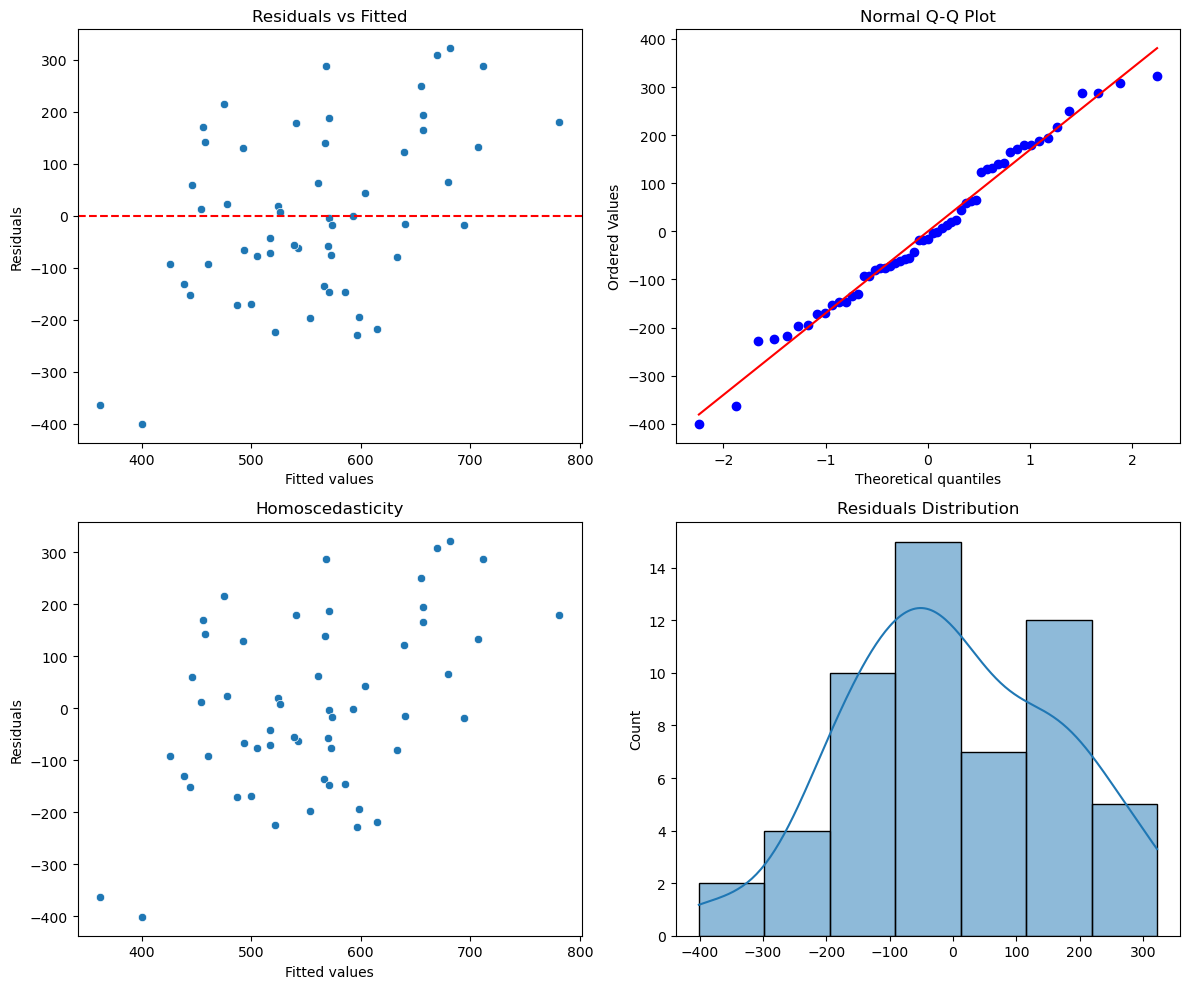

Shapiro-Wilk test p-value: 0.5418121814727783
Bartlett’s test p-value: 5.5482963858995894e-06
White test p-value: 0.8846198677752354
Levene’s test p-value for the whole model: 0.1705241752226429


/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_3074/3943568153.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  levene = stats.levene(*[group_residuals for name, group_residuals in residuals.groupby(groups)])


TypeError: 'NoneType' object is not iterable

In [42]:
check_assumptions(result, mean_df_family)

In [43]:

# Mixed-effects model (random intercept for family)
mixed_model = smf.mixedlm("mean_RT ~ age + sex", mean_df_family, groups=mean_df_family["family_id"])
mixed_result = mixed_model.fit()

# Fixed-effects model (no family random effect)
fixed_model = smf.ols("mean_RT ~ age + sex", mean_df_family).fit()

# Print summaries
print("Mixed-Effects Model Summary:")
print(mixed_result.summary())

print("\nFixed-Effects Model Summary:")
print(fixed_model.summary())

Mixed-Effects Model Summary:
           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  mean_RT   
No. Observations:   55       Method:              REML      
No. Groups:         27       Scale:               36053.6560
Min. group size:    2        Log-Likelihood:      -361.5101 
Max. group size:    3        Converged:           Yes       
Mean group size:    2.0                                     
------------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------
Intercept     582.114   90.889  6.405 0.000  403.976 760.253
sex[T.male]   -98.507   70.872 -1.390 0.165 -237.414  40.399
age             0.730    2.076  0.351 0.725   -3.340   4.799
Group Var   12951.690   60.798                              


Fixed-Effects Model Summary:
                            OLS Regression Results                            
Dep. Variable:     

In [44]:

from scipy.stats import chi2
# Log-likelihoods for both models
ll_mixed = mixed_result.llf  # Log-likelihood of mixed model
ll_fixed = fixed_model.llf  # Log-likelihood of fixed model

# Likelihood ratio test statistic
lr_stat = 2 * (ll_mixed - ll_fixed)

# Degrees of freedom (number of random effects added in mixed model)
df_diff = 1

# Calculate p-value
p_value = chi2.sf(lr_stat, df_diff)

print(f"Likelihood Ratio Test Statistic: {lr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The mixed model is significantly better. Retain family random effect.")

Likelihood Ratio Test Statistic: 24.1833
P-value: 0.0000
The mixed model is significantly better. Retain family random effect.


In [45]:
#by adding family the model is a ot better (adding family is predcitng the reaction tiem)

In [46]:
# Extract variance components
family_variance = mixed_result.cov_re.iloc[0, 0]  # Between-family variance
residual_variance = mixed_result.scale            # Within-family variance

# Compute ICC
icc = family_variance / (family_variance + residual_variance)
print("family variance", family_variance)
print("residual variance", residual_variance)
print(f"ICC: {icc:.4f}")

family variance 12951.690196257356
residual variance 36053.65600654402
ICC: 0.2643


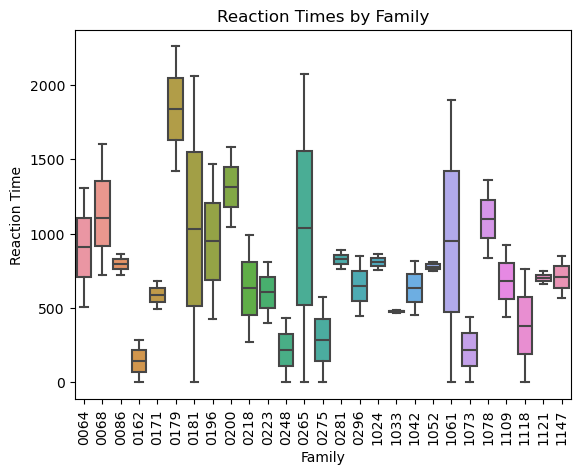

In [47]:
# Assuming 'mean_df_family' is your dataset and 'family_id' represents the family group
sns.boxplot(x='family_id', y='VS_SAC_RT', data=mean_df_family) #five and single 
plt.title('Reaction Times by Family')
plt.xlabel('Family')
plt.ylabel('Reaction Time')
plt.xticks(rotation=90)  # Rotate family labels if necessary
plt.show()

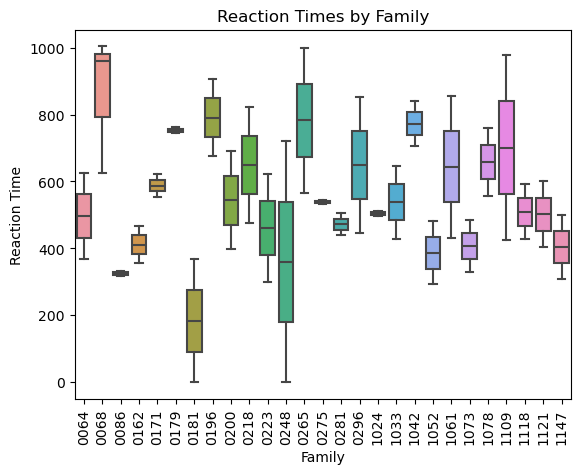

In [48]:
# Assuming 'mean_df_family' is your dataset and 'family_id' represents the family group
sns.boxplot(x='family_id', y='mean_RT', data=mean_df_family)
plt.title('Reaction Times by Family')
plt.xlabel('Family')
plt.ylabel('Reaction Time')
plt.xticks(rotation=90)  # Rotate family labels if necessary
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='VS_SAC_RT', ylabel='Count'>

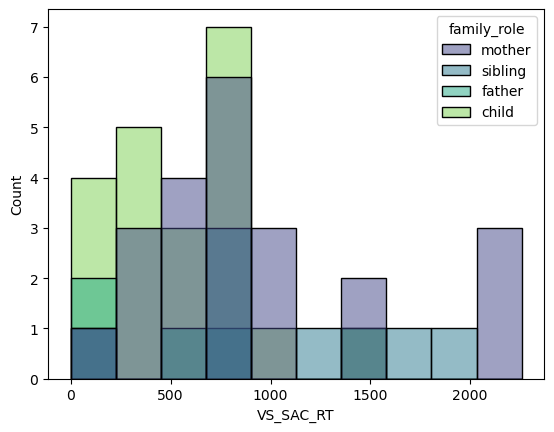

In [77]:
# Plot the distribution of disenage by family
sns.histplot(x='VS_SAC_RT', data=mean_df_family, hue='family_role', palette='viridis')

In [76]:
mean_df_family

,subject,mean_RT,Trial_Index_,condition,detail,VS_SAC_RT,VS_VALID,age,group,site,sex,asd,adhd,age_group,diagnosis_group,family_id,family_role,parents,n_family
0,0064M1,367.533333,1,Five,Single,505,True,38.204754,mother,hsj,female,control,0,adult,control,0064,mother,parent,2
1,0064S1,626.000000,1,Five,Single,1308,True,12.345223,sibling,hsj,male,asd,0,child,asd,0064,sibling,child,2
2,0068M1,960.533333,1,Five,Single,1106,True,33.205222,mother,mni,female,control,0,adult,control,0068,mother,parent,3
3,0068S1,624.588235,1,Five,Single,1599,True,7.619595,sibling,mni,male,asd,0,child,asd,0068,sibling,child,3
4,0068S3,1003.967742,1,Five,Single,721,True,4.788599,sibling,mni,male,control,0,child,control,0068,sibling,child,3
5,0086F1,332.933333,1,Five,Single,861,True,47.831235,father,hsj,male,control,0,adult,control,0086,father,parent,2
6,0086S1,316.033333,1,Five,Single,724,True,19.337837,sibling,hsj,female,asd,0,adult,asd,0086,sibling,child,2
7,0162M1,355.800000,1,Five,Single,287,True,41.668207,mother,hsj,female,control,0,adult,control,0162,mother,parent,2
8,0162P,466.387097,1,Five,Single,-1,False,12.996845,proband,hsj,male,control,1,child,adhd,0162,child,child,2
9,0171M1,552.733333,1,Five,Single,494,True,40.132127,mother,mni,female,control,0,adult,control,0171,mother,parent,2


/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_73625/496509307.py:52: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='family_id', y=variable, color='red', label='Parent Mean Reaction', data=parent_means,


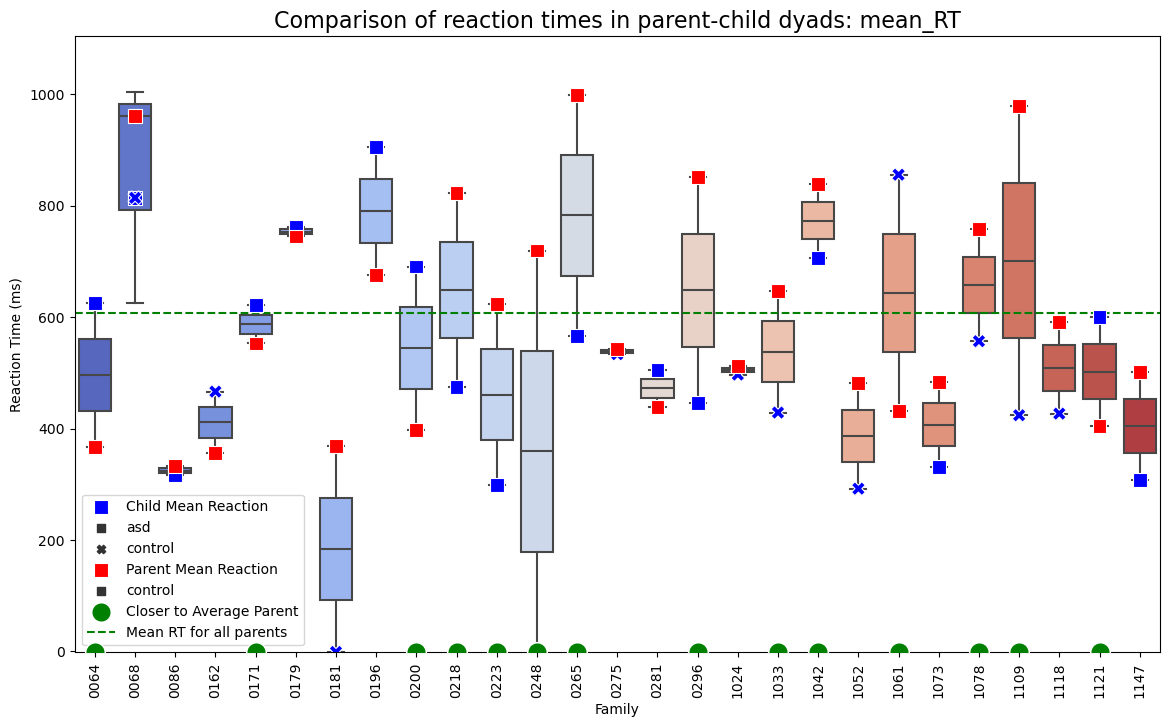

In [81]:
# Variable to test
variable = 'mean_RT'

family_order = mean_df_family['family_id'].unique()



# Step 1: Calculate the boxplot for each family
# First, split the dataset by family_role (mother vs child)
children_data = mean_df_family[mean_df_family['parents'] == 'child']
mothers_data = mean_df_family[mean_df_family['parents'] == 'parent']

# Step 2: Calculate the mean reaction time for children and mothers within families
child_means = children_data.groupby('family_id')[variable].mean().reset_index()
parent_means = mothers_data.groupby('family_id')[variable].mean().reset_index()

# Merge ndd with the child_means and parent_means
child_means = child_means.merge(children_data[['family_id', 'asd']], on='family_id', how='left')
parent_means = parent_means.merge(mothers_data[['family_id', 'asd']], on='family_id', how='left')

# Average for moms
avg_mom_rt = mothers_data[variable].mean()

# Step 4: Calculate absolute differences for each family
child_means['diff_within'] = abs(child_means[variable] - child_means['family_id'].map(parent_means.set_index('family_id')[variable]))
child_means['diff_random'] = abs(child_means[variable] - avg_mom_rt)


# Step 5: Identify families where the child's reaction time is closer to the random mother’s
highlight_families = child_means[child_means['diff_random'] < child_means['diff_within']]['family_id']

# Step 6: Create the plot
plt.figure(figsize=(14, 8))

# Sort dataframes by family_id order
child_means['family_id'] = pd.Categorical(child_means['family_id'], categories=family_order, ordered=True)
child_means = child_means.sort_values('family_id')

parent_means['family_id'] = pd.Categorical(parent_means['family_id'], categories=family_order, ordered=True)
parent_means = parent_means.sort_values('family_id')

highlight_families = pd.Categorical(highlight_families, categories=family_order, ordered=True)
highlight_families = highlight_families.sort_values()

# Plot the boxplot for each family, showing mother and child side by side
sns.boxplot(x='family_id', y=variable, data=mean_df_family, showfliers=False, palette='coolwarm')


# Overlay mean reaction times for children and random mothers
sns.scatterplot(x='family_id', y=variable, color='blue', label='Child Mean Reaction',
                 s=100, zorder=5, style='asd', data=child_means, markers=['s','X'])
sns.scatterplot(x='family_id', y=variable, color='red', label='Parent Mean Reaction', data=parent_means,
                 s=100, zorder=5, style='asd', markers=['s', "X"])

# Add y limits based on reaction times for clarity. Make custome limits
ymax= mean_df_family[variable].max() * 1.1

if mean_df_family[variable].min() < 0:
    ymin= mean_df_family[variable].min() * 1.5
    closer_ymin= ymin - ymin*0.1

else:
    ymin= mean_df_family[variable].min() * 0.5
    closer_ymin= ymin + ymin*0.2

# Highlight families where child’s reaction time is closer to the random mother’s average
sns.scatterplot(x=highlight_families, y=closer_ymin,
                color='green', label='Closer to Average Parent', s=200, zorder=10, marker='o')

# Plot the overall mean reaction time for context
plt.axhline(y=mothers_data[variable].mean(), color='green', linestyle='--', label='Mean RT for all parents')

plt.ylim(ymin, ymax)

# Add titles and labels
plt.title(F'Comparison of reaction times in parent-child dyads: {variable}', fontsize=16)
plt.xlabel('Family')
plt.ylabel('Reaction Time (ms)')
plt.xticks(rotation=90)

# Show legend for clarity
plt.legend()


# Show the plot
plt.show()

In [ ]:
# children are faster on average
# average for all parents (closer to mom or to random parent (Average parent)) problems: 0171, 1121
#can maybe take them out 

/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_73625/51710789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df_family_parent["parent_rt"] = mean_df_family_parent[variable]
/var/folders/l2/gldr348j5ngb9kyqkcy1nswh0000gn/T/ipykernel_73625/51710789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df_family_child["child_rt"] = mean_df_family_child[variable]


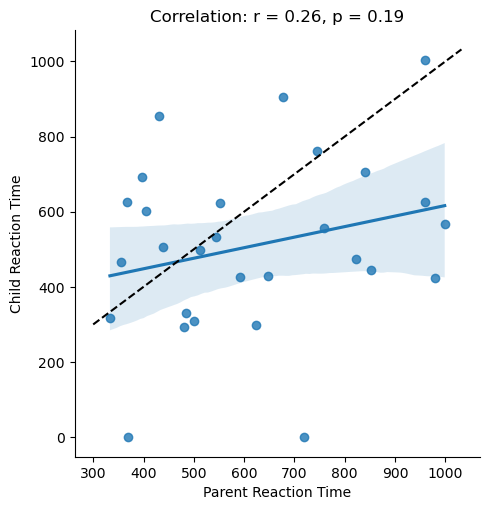

In [82]:
# Calcualte correlation betwen child and mom's reaction times
mean_df_family_parent=mean_df_family[mean_df_family.parents=="parent"]
mean_df_family_child=mean_df_family[mean_df_family.parents=="child"]

mean_df_family_parent["parent_rt"] = mean_df_family_parent[variable]
mean_df_family_child["child_rt"] = mean_df_family_child[variable]

# Merge the two dataframes
mean_df_family_parent_child=pd.merge(mean_df_family_parent, mean_df_family_child, on="family_id", how="inner")


# Calculate the correlation between mother and child reaction times
r, p = stats.pearsonr(mean_df_family_parent_child["parent_rt"], mean_df_family_parent_child["child_rt"])
r= round(r, 2)
p= round(p, 2)

# Plot the relationship between mother and child reaction times
sns.lmplot(x="parent_rt", y="child_rt", data=mean_df_family_parent_child, palette="Sett1")


plt.xlabel("Parent Reaction Time")
plt.ylabel("Child Reaction Time")
plt.title(f"Correlation: r = {r}, p = {p}")


# Add diagonal line that represents perfect correlation (r = 1)
xmin, xmax = plt.xlim()
#ymin, ymax = plt.ylim()
plt.plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")




plt.show()  

